<a href="https://colab.research.google.com/github/luckyetameta/MyGoCode/blob/main/Data_Visualization_Check_Point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Visualization Check Point**

Objective
Data Visualization
Let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you must accomplish the following 
tasks:

Preprocessing phase:
After importing the dataset using Pandas start by showing the head of 
the dataset then some general information about the data columns and 
values.

As a next step, apply what you have learned in the course to preprocess 
your data: find missing information and replace it with the appropriate 
values.

Verify that your data is ready to be treated.

2. Visualization phase:

Start by studying the distribution of the most important features based 
on your understanding of the dataset and the problem.

Visualize the correlation between Sex and Age in a plot of your 
choosing. The visualized plot should give us obvious deductions 
concerning the importance of age and sex in the survival of the 
individuals.

Pick two other features and study their impact on the survival of the 
individuals.

Have a look at this function:

def plot_correlation_map( df ):

     corr = df.corr()

     s , ax = plt.subplots( figsize =( 12 , 10 ) )

     cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

     s = sns.heatmap(

         corr,

         cmap = cmap,

         square=True,

         cbar_kws={ 'shrink' : .9 },

         ax=ax,

         annot = True,

         annot_kws = { 'fontsize' : 12 }

         )

Try running the function, analyze what it does exactly and its 
utilities. Write a paragraph describing your analysis (the paragraph 
should be in English).

Use the groupby function combined with the mean() to view the relation 
between Pclass and survived

As a final step, try to drop the useless columns (such as Names).

We dropped the column Names because we evaluated it to be useless. But 
that's ultimately not the case because we can create a very useful 
feature from Names.

Your task now is to create a new column called Title which contains the 
appropriate Title for each individual. Hint: Extract the title from the 
column Names.

Visualize the correlation between Title and other features(e.g Sex, 
Fare, Age).

As you have seen, there are a lot of titles which makes the feature very 
impractical. Let's try to group these titles into more useful ones.

Hint: Use the following dictionary

Title_Dictionary = {

                     "Capt":       "Officer",

                     "Col":        "Officer",

                     "Major":      "Officer",

                       "Dr":         "Officer",

                     "Rev":        "Officer”,

                     "Jonkheer":   "Royalty",

                     "Don":        "Royalty",

                     "Sir" :       "Royalty",

                    "Lady" :      "Royalty"

                   "the Countess": "Royalty",

                     "Dona":       "Royalty”,

                     "Mme":        "Miss",

                     "Mlle":       "Miss",

                     "Miss" :      "Miss",

                     "Ms":         "Mrs",

                     "Mr" :        "Mrs",

                     "Mrs" :       "Mrs

                     "Master" :    "Master"

                     }

Let's visualize the same correlations using these new titles now.

Finally, use the Parch and the SibSp columns to create a more useful 
feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful 
or not.


In [80]:
import pandas as pd

In [81]:
import numpy as np

In [82]:
import seaborn as sb

In [83]:
import matplotlib.pyplot as plt

In [84]:
titanic = pd.read_csv("/content/titanic 01.csv")

In [85]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
titanic.isnull().sum() #before replacing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
titanic['Age'].fillna (titanic['Age'].mean(), inplace = True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [89]:
titanic.isnull().sum() #after replacing 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
titanic['Age'].fillna (titanic['Age'].mode(), inplace = True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [91]:
titanic['Cabin'].fillna('Cabin',inplace =True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [92]:
titanic.isnull().sum()# to check missing value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [93]:
titanic['Embarked'].fillna('Embarked',inplace =True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [94]:
titanic.isnull().sum()# replacing missing value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [95]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [96]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

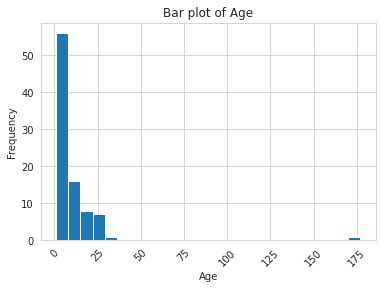

In [97]:
plt.xlabel('Age') # Age distribution 
plt.ylabel('Age count')
plt.title('Bar plot of Age')
Tic = titanic['Age'].value_counts()
Tic.plot.hist(rot = 45, bins = 25)


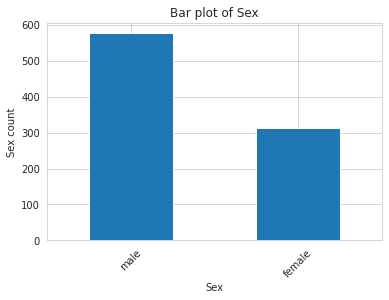

In [98]:
plt.xlabel('Sex') # Sex distribution 
plt.ylabel('Sex count')
plt.title('Bar plot of Sex')
Tic = titanic['Sex'].value_counts()
Tic.plot.bar(rot = 45)

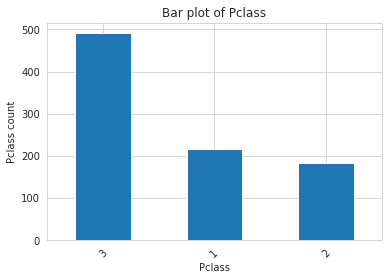

In [99]:
plt.xlabel('Pclass') #Passengers' class distribution
plt.ylabel('Pclass count')
plt.title('Bar plot of Pclass')
Tic = titanic['Pclass'].value_counts()
Tic.plot.bar(rot = 45)

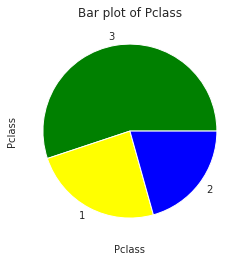

In [100]:
plt.xlabel('Pclass') #Passengers' class distribution
plt.ylabel('Pclass count')
plt.title('Bar plot of Pclass')
Tic = titanic['Pclass'].value_counts()
Tic.plot.pie(rot = 45, colors =['green', 'yellow', 'blue'])

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text major ticklabel objects>)

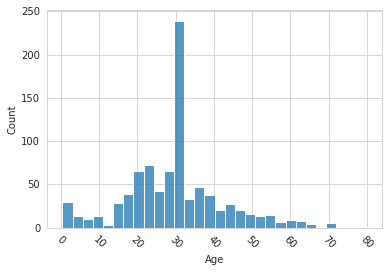

In [101]:
sb.histplot(x = 'Age', data = titanic) #Visualization with seaborn using histplot
plt.xticks(rotation =-45)

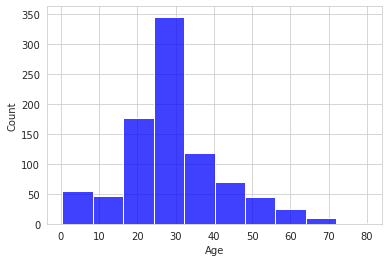

In [102]:
sb.histplot(data = titanic, x = 'Age', bins =10, color = 'blue') # visualization with seaborn plus bin

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


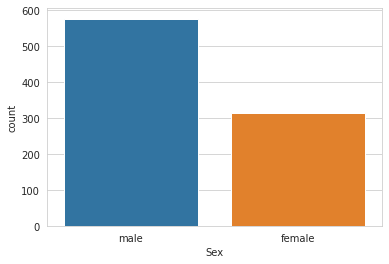

In [103]:
sb.countplot(titanic['Sex'])

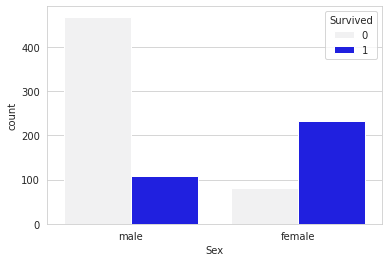

In [104]:
sb.countplot(data = titanic, x = 'Sex', color = 'blue', hue ='Survived')

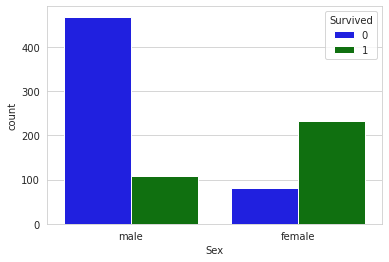

In [105]:
sb.countplot(data = titanic, x = 'Sex', palette = ['blue', 'green' ], hue ='Survived')

Correlation of visualization= Sex and Age

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


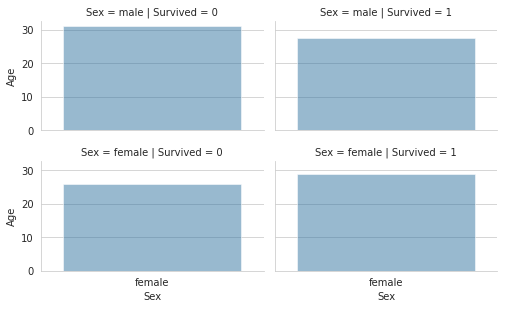

In [106]:
grid = sb.FacetGrid(titanic, row="Sex", col="Survived", size=2.2, aspect=1.6) # Sex and Age
grid.map(sb.barplot, "Sex", 'Age', alpha=.5, ci=None)
grid.add_legend()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


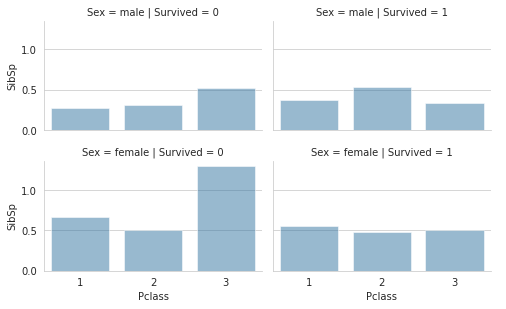

In [107]:
grid = sb.FacetGrid(titanic, row="Sex", col="Survived", size=2.2, aspect=1.6) # Plcass and Sibsp
grid.map(sb.barplot, "Pclass", 'SibSp', alpha=.5, ci=None)
grid.add_legend()


**Boxplot**

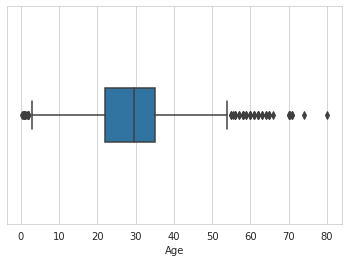

In [108]:
sb.boxplot(x = titanic['Age'], width = 0.25)

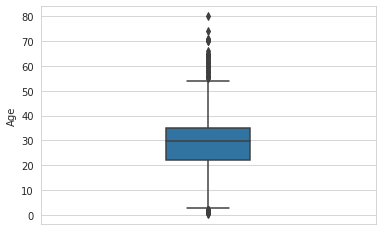

In [109]:
sb.set_style('whitegrid')

sb.boxplot(y = 'Age', data = titanic, width =0.25)

**Heatmap**

In [110]:
def plot_correlation_map(df):
  corr = df.corr()

  s , ax = plt.subplots( figsize =( 12 , 10 ) )

  cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )

  s = sb.heatmap(

      corr,

      cmap = cmap,

      square=True,

      cbar_kws={ 'shrink' : .9 },

      ax=ax,

      annot = True,

      annot_kws = { 'fontsize' : 12 }

      )
  

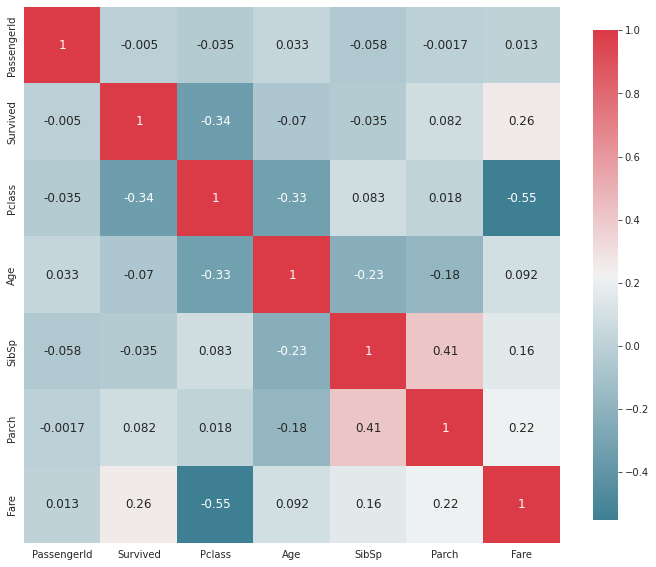

In [111]:
plot_correlation_map(titanic)

From the dataset, age and Parch have a negetive correlation as the result shows -0.23.

Also, we see that the rat of survival has a positive correlation with fare. Therefore, far is a determinant whether a passenger survives or not.

In [112]:
titanic.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


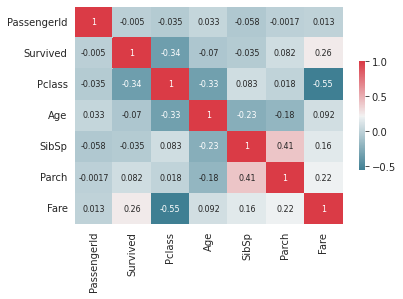

In [113]:
s = sb.heatmap(titanic.corr(),
                cmap = sb.diverging_palette(220 , 10 , as_cmap = True),
               square=False,
               cbar_kws ={ 'shrink' : .5},
               annot = True,
               annot_kws = {'fontsize' : 8})

**Groupby**

In [114]:
titanic.groupby(['Survived' , 'Pclass']).agg(total = ('Survived', 'count'))

total
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [115]:
t2 = titanic.groupby(['Survived' , 'Pclass']).agg(total = ('Survived', 'count'))
t2

total
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [116]:
lis1 = ['{:,.2%}'.format(r /t2['total'][:3].sum()) for r in t2['total'][:3]] #percentage of passengers that didn't survive.
lis1

['14.57%', '17.67%', '67.76%']

In [117]:
lis2 = ['{:,.2%}'.format(r /t2['total'][3:].sum()) for r in t2['total'][3:]] #percentage of passengers that survived.
lis2

['39.77%', '25.44%', '34.80%']

In [118]:
lis3 = lis1 + lis2
lis3

['14.57%', '17.67%', '67.76%', '39.77%', '25.44%', '34.80%']

In [119]:
lis1.extend(lis2)
lis1

['14.57%', '17.67%', '67.76%', '39.77%', '25.44%', '34.80%']

In [120]:
t2['proportion'] = lis1
t2

total proportion
Survived Pclass                  
0        1          80     14.57%
         2          97     17.67%
         3         372     67.76%
1        1         136     39.77%
         2          87     25.44%
         3         119     34.80%

In [131]:
td = {       "Capt":       "Officer",

                 "Col":        "Officer",

                 "Major":      "Officer",

                   "Dr":         "Officer",

                 "Rev":        "Officer",

                 "Jonkheer":   "Royalty",

                 "Don":        "Royalty",

                 "Sir" :       "Royalty",

                "Lady" :      "Royalty",

               "the Countess": "Royalty",

                 "Dona":       "Royalty",

                 "Mme":        "Miss",

                 "Mlle":       "Miss",

                 "Miss" :      "Miss",

                 "Ms":         "Mrs",

                 "Mr" :        "Mrs",

                 "Mrs" :       "Mrs",

                 "Master" :    "Master"

                 }

In [132]:
td.keys()

dict_keys(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir', 'Lady', 'the Countess', 'Dona', 'Mme', 'Mlle', 'Miss', 'Ms', 'Mr', 'Mrs', 'Master'])

In [134]:
td.values()

dict_values(['Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Master'])

In [135]:
old_title = []
new_title = []
for name in titanic['Name']:
  for t,u in zip(td.keys(), td.values()):
    t = t + "."
    if t in name:
      old_title.append(t)
      new_title.append(u)

In [136]:
len(old_title)== len(titanic)

True

In [138]:
len(new_title)== len(titanic)

True

In [139]:
titanic['old_title'] = old_title
titanic['new_title'] = new_title

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_title,new_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Cabin,S,Mr.,Mrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Cabin,S,Miss.,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Cabin,S,Mr.,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Cabin,S,Rev.,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss.,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Cabin,S,Miss.,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr.,Mrs


**New_title and Survived Countplot**

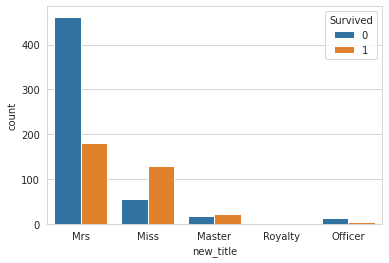

In [146]:
sb.countplot(data = titanic, x = 'new_title',  hue = 'Survived')

**Family_Size-New value**

In [141]:
titanic['Fmaily_Size'] = titanic['SibSp'] + titanic['Parch']

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_title,new_title,Fmaily_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Cabin,S,Mr.,Mrs,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Cabin,S,Miss.,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Cabin,S,Mr.,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Cabin,S,Rev.,Officer,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss.,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Cabin,S,Miss.,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr.,Mrs,0


**Heatmap**

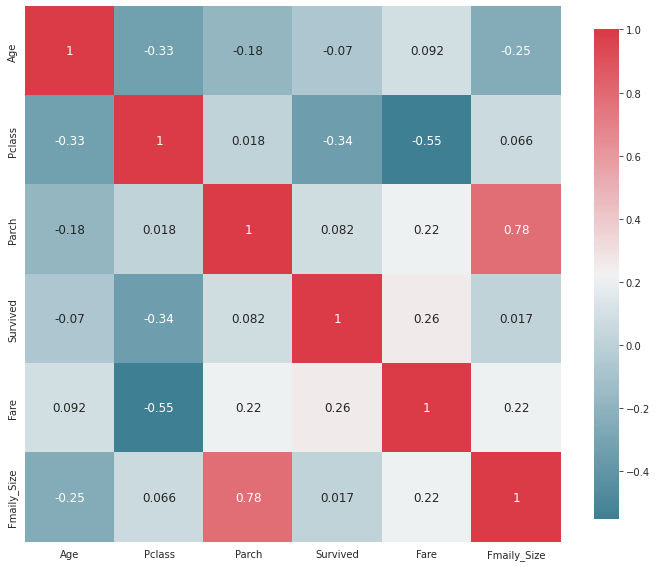

In [151]:
plot_correlation_map(titanic[['Age', 'Pclass', 'Parch', 'Survived', 'Fare', 'Fmaily_Size']])